<a href="https://colab.research.google.com/github/jon-chun/2018-fall-kenyon-iphs391/blob/master/sa_tweets_class_20211204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jon Chun
24 Oct 2021

# **Requirements**

* Must use **Chrome** browser (esp not Safari)
* Use only **plain text** files (no *.rtf, *.doc, etc)

# **Setup and Configuration**

In [ ]:
!nvidia-smi

Tue Dec  6 05:22:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/Deffro/text-preprocessing-techniques.git
%cd text-preprocessing-techniques
!ls -altr

Cloning into 'text-preprocessing-techniques'...
remote: Enumerating objects: 35, done.
remote: Total 35 (delta 0), reused 0 (delta 0), pack-reused 35
Unpacking objects: 100% (35/35), done.
/content/text-preprocessing-techniques
total 6720
drwxr-xr-x 1 root root    4096 Dec  6 05:22 ..
-rw-r--r-- 1 root root    2157 Dec  6 05:22 README.md
-rw-r--r-- 1 root root    5181 Dec  6 05:22 slang.txt
-rw-r--r-- 1 root root    8174 Dec  6 05:22 preprocess.py
-rw-r--r-- 1 root root 6617121 Dec  6 05:22 corporaForSpellCorrection.txt
-rw-r--r-- 1 root root    8009 Dec  6 05:22 techniques.py
-rw-r--r-- 1 root root  220883 Dec  6 05:22 ss-twitterfinal.txt
drwxr-xr-x 8 root root    4096 Dec  6 05:22 .git
drwxr-xr-x 3 root root    4096 Dec  6 05:22 .


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 1.2 MB/s 
     |████████████████████████████████| 7.6 MB 13.7 MB/s 
     |████████████████████████████████| 182 kB 55.6 MB/s 


In [ ]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 175 kB 50.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=735c80639971b3700c253a4afa2e9698c28999d706d1e0a2e8bfd4e315502892
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [ ]:
# This library contains a function that takes a string object, possibly containing non-ASCII characters, and returns a string

!pip install unidecode  # clean-text dependency

# Dealing with encodings
# import binascii

# !pip install chardet
# import chardet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 22.1 MB/s 


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 21.6 MB/s 
     |████████████████████████████████| 287 kB 65.1 MB/s 


In [ ]:
!pip install python-slugify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install arrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 4.5 MB/s 


In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 7.6 MB/s 


In [ ]:
# Install optional libraries

# !pip install emoji
!pip install emoticon-fix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for emoticon-fix: filename=emoticon_fix-0.0.2-py3-none-any.whl size=3448 sha256=5cc67eb9f00f2143b4a70fd2c3c813741ec2e8a27e8c2f57b578985782c4ee6c
  Stored in directory: /root/.cache/pip/wheels/a1/c9/0c/df1f040fdda294413121bf278d88dc3840a4b6f50579bb2681
Successfully built emoticon-fix


In [ ]:
# Test

from emoticon_fix import emoticon_fix

text = 'test :) test :D test'
emoticon_fix.emoticon_fix(text)

'test Smile test Laugh test'

In [ ]:
# Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import chardet
from pprint import pprint
import datetime 
import string
import re

from tqdm import tqdm
# from pprint import pprint
# from logging import error


from scipy.signal import find_peaks

from google.colab import files

# Import functions to preprocess Tweets
# https://github.com/Deffro/text-preprocessing-techniques/blob/master/techniques.py


In [ ]:
# Import Twitter specific preprocessing files

from cleantext import clean

import contractions

from slugify import slugify

import emoji

from techniques import *

In [ ]:
# Setup matplotlib

# %matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Globals

In [ ]:
# Global Vars

novel_filename_str = ''
novel_title_str = ''
novel_raw_str = ''
novel_clean_str = ''

novel_lines_ls = []
novel_sentences_ls = []
novel_paragraphs_ls = []

# Main (Modin) DataFrame for Novel Sentiments
data_df = pd.DataFrame

TEXT_ENCODING = 'utf-8'

In [ ]:
def verify_novel(anovel_raw_str, anovel_title_str, index_ends=500):
  '''
  INPUT: string in some stage of processing
  OUTPUT: display summary index_ends chars of header/footer for verification
  '''

  print(f'Novel Title: {anovel_title_str}')
  print(f'  Char Len: {len(anovel_raw_str)}')
  print('====================================\n')
  print(f'Beginning:\n\n {anovel_raw_str[:index_ends]}\n\n')
  print('\n------------------------------------')
  print(f'Ending:\n\n {anovel_raw_str[-index_ends:]}\n\n')

In [ ]:
def save_text2txt_and_download(text_obj, file_suffix='_save.txt'):
  '''
  INPUT: text object and suffix to add to output text filename
  OUTPUT: Write text object to text file (both temp VM and download)
  '''

  if type(text_obj) == str:
    print('STEP 1. Processing String Object\n')
    str_obj = text_obj
  elif type(text_obj) == list:
    if (len(text_obj) > 0):
      if type(text_obj[0]) == str:
        print('STEP 1. Processing List of Strings Object\n')
        str_obj = "\n".join(text_obj)
      else:
        print('ERROR: Object is not an List of Strings [save_text2txt_and_download()]')
        return -1
    else:
      print('ERROR: Object is an empty List [save_text2txt_and_download()]')
      return -1
  else:
    print('ERROR: Object Type is neither String nor List [save_text2txt_and_download()]')
    return -1

  datetime_str = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  # out_filename = novel_name_str.split('.')[0] + '_' + datetime_str + file_suffix
  out_filename = novel_name_str.split('.')[0] + file_suffix

  # Write file to temporary VM filesystem
  print(f'STEP 2. Saving textfile to temporary VM file: {out_filename}\n')
  with open(out_filename, "w") as fp:
    fp.write(str_obj)

  # Download permanent copy of file
  print(f'STEP 3. Downloading permanent copy of textfile: {out_filename}\n')
  files.download(out_filename)

In [ ]:
def save_df2csv_and_download(df_obj, file_suffix='_save.csv', nodate=True):
  '''
  INPUT: DataFrame object and suffix to add to output csv filename
  OUTPUT: Write DataFrame object to csv file (both temp VM and download)
  '''

  if isinstance(df_obj, pd.DataFrame):
    datetime_str = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    if nodate:
      out_filename = novel_name_str.split('.')[0] + file_suffix
    else:
      out_filename = novel_name_str.split('.')[0] + '_' + datetime_str + file_suffix
    # print(f'STEP 1. Saving DataFrame: {df_obj.__name__} to temporary VM file: {out_filename}\n') # Also, isinstance(obj, pd.DataFrame)
    print(f'STEP 1. Saving DataFrame to temporary VM file: {out_filename}\n')
    df_obj.to_csv(out_filename, index=False) 
  else:
    print(f'ERROR: Object is not a DataFrame [save_df2csv_and_download()]')
    return -1

  # Download permanent copy of file
  print(f'STEP 2. Downloading permanent copy of csvfile: {out_filename}\n')
  files.download(out_filename)


# Test

# save_df2csv_and_download(temp_df, '_bert-nlptown.txt')

In [ ]:
def expand_contractions(input_str):
  '''
  INPUT: long string
  OUTPUT: long string with expanded contractions
  '''

  output_str = contractions.fix(input_str)

  return output_str

"""
# novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_ls]
novel_clean_ls = [contractions.fix(x) for x in novel_ls]
novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_clean_ls]
novel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]
# novel_clean_ls = [re.sub(r"^[\"\']", "", x) for x in novel_clean_ls]  # re.sub("[\"\']", "", s)
# novel_clean_ls = [re.sub(r"[\"\']$", "", x) for x in novel_clean_ls]
novel_clean_ls = [x.encode('ascii',errors='ignore').decode() for x in novel_clean_ls]
# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

[f'[{x}]' for x in novel_clean_ls]
"""

'\n# novel_clean_ls = [re.sub(r\'[\n]+\', \' \', x).strip() for x in novel_ls]\nnovel_clean_ls = [contractions.fix(x) for x in novel_ls]\nnovel_clean_ls = [re.sub(r\'[\n]+\', \' \', x).strip() for x in novel_clean_ls]\nnovel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]\n# novel_clean_ls = [re.sub(r"^["\']", "", x) for x in novel_clean_ls]  # re.sub("["\']", "", s)\n# novel_clean_ls = [re.sub(r"["\']$", "", x) for x in novel_clean_ls]\nnovel_clean_ls = [x.encode(\'ascii\',errors=\'ignore\').decode() for x in novel_clean_ls]\n# novel_bin = novel_clean_str.encode(\'ascii\',errors=\'ignore\')\n# novel_clean_str = novel_bin.decode()\n\n[f\'[{x}]\' for x in novel_clean_ls]\n'

# **Get the Novel Text - ONLY DO Option (a)**

## OPTION (a): Scrape Twitter with snscrape

In [ ]:
import snscrape
import snscrape.modules.twitter as sntwitter

# import arrow

# end_date = arrow.utcnow().format('YYYY-MM-DD')
# start_date = utc.shift(days=-7).format('YYYY-MM-DD')

# print(f'start_date: {start_date}')
# print(f'  end_date: {end_date}')

# local.format('YYYY-MM-DD HH:mm:ss ZZ')

# Set default search parameters
# today = datetime.date.today()
# end_date = today
# start_date = end_date

In [ ]:
# import arrow

# end_date = arrow.utcnow().format('YYYY-MM-DD')
# start_date = utc.shift(days=-7).format('YYYY-MM-DD')

# print(f'start_date: {start_date}')
# print(f'  end_date: {end_date}')

# local.format('YYYY-MM-DD HH:mm:ss ZZ')

start_date: 2022-11-29
  end_date: 2022-12-06


## INSTRUCTIONS

Pick a current topic since you can only search for Tweets starting **from today backwards** in time.

1. Search by username or Keyword/Hashtag
2. Spaces between multiple keywords act as AND
2. Tweets will be scraped from Now/Today backwards
3. (max_results) Tweets from the Now/Today back will be retrived
4. How far back in time (start_date) will be determined based upon:
  * The frequency of matching Tweets 
  * The max_results number of Tweets requested

In [ ]:
#@title Twitter Search Type and Parameters

search_type = "keyword" #@param ["keyword", "username", "hashtag"]

search_term = "twitter acquisition" #@param {type:"string"}

# start_target_date = '2022-11-01' #@param {type:"date"}

# end_target_date = '2022-11-14' #@param {type:"date"}

max_results = 10000 #@param {type:"slider", min:100, max:10000, step:100}



In [ ]:
start_retrieve_date = data_df.datetime.min().strftime('%Y-%m-%d_%H-%M-%S')
end_retrieve_date = data_df.datetime.max().strftime('%Y-%m-%d_%H-%M-%S')

In [ ]:
%%time

# EXECUTE SEARCH/SCRAPE

# NOTE: 2m15s on Sun 20221204 @ 14:26PM EST on Colab Pro T4 getting 5k Tweets 
#       3m44s on Sun 20221204 @ 15:51PM EST on Colab Pro T4 getting 5k Tweets 
#       3m22s on Tue 20221206 @ 02:26AM EST on Colab Pro T4 getting 5k Tweets 
#       6m27s on Tue 20221206 @ 02:32AM EST on Colab Pro T4 getting 10k Tweets 

data_df = pd.DataFrame()

# Creating list to append tweet data to
tweet_ls = []

if ((search_type == "keyword") | (search_type == "hashtag")):
  print(f'EXECUTING: keyword search: [{search_term}] from [{start_target_date}] to [{end_target_date}]\n')
  for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{search_term}').get_items()):
    if i >= max_results:
      break
    tweet_ls.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.retweetedTweet, tweet.quotedTweet])
  print(f'  {len(tweet_ls)} Tweets received')
  data_df = pd.DataFrame(tweet_ls, columns=['datetime','id','tweet','username','reply_ct','retweet_ct','like_ct','quote_ct','retweeted_id','quoted_id'])
  data_df.sort_values('datetime',inplace=True)

elif search_type == "username":
  print(f'EXECUTING: username search: [{search_term}] from [{start_target_date}] to [{end_target_date}]\n')
  # Using TwitterSearchScraper to scrape data and append tweets to list
  for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'from:{search_term}').get_items()):
    if i >= max_results:
      break
    tweet_ls.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.retweetedTweet, tweet.quotedTweet])
  print(f'  {len(tweet_ls)} Tweets received')
  data_df = pd.DataFrame(tweet_ls, columns=['datetime','id','tweet','username','reply_ct','retweet_ct','like_ct','quote_ct','retweeted_id','quoted_id'])
  data_df.sort_values('datetime',inplace=True)

# elif search_type == "hashtag":
#   print(f'EXECUTING: hashtag search: [{search_term}] from [{start_date}] to [{end_date}]\n')

else:
  print(f"ERROR: Illegal search_type: {search_type}")

# Calculate Data Range
print(f'Tweet Dataset Retrieved:\n')

# start_retrieve_date = data_df.datetime.min().strftime('%Y-%m-%d-%H:%M:%S')
# end_retrieve_date = data_df.datetime.max().strftime('%Y-%m-%d-%H:%M:%S')
start_retrieve_date = data_df.datetime.min().strftime('%Y-%m-%d_%H-%M-%S')
end_retrieve_date = data_df.datetime.max().strftime('%Y-%m-%d_%H-%M-%S')

print(f' Raw Tweet Count: {data_df.shape[0]}')
print('\n')
print(f'      First Date: {start_retrieve_date} (vs start_target_date: {start_target_date})')
print(f'       Last Date: {end_retrieve_date} (vs end_target_date: {end_target_date})')
print('\n')
print(f'   ReTweet Count: {data_df.retweeted_id.count().sum()}')
print(f'    Quoted Count: {data_df.quoted_id.count().sum()}')
print('\n')
print(f'     Reply %: {100*data_df.reply_ct.count().sum()/data_df.shape[0]:.2f}%')
print(f'   ReTweet %: {100*data_df.retweet_ct.count().sum()/data_df.shape[0]:.2f}%')
print(f'      Like %: {100*data_df.like_ct.count().sum()/data_df.shape[0]:.2f}%')
print(f'     Quote %: {100*data_df.quote_ct.count().sum()/data_df.shape[0]:.2f}%')

print('\n')

EXECUTING: keyword search: [twitter acquisition] from [2022-11-01] to [2022-11-14]

  10000 Tweets received
Tweet Dataset Retrieved:

 Raw Tweet Count: 10000


      First Date: 2022-11-07 12:52:15+00:00 (vs start_target_date: 2022-11-01)
       Last Date: 2022-12-06 07:15:49+00:00 (vs end_target_date: 2022-11-14)


   ReTweet Count: 0
    Quoted Count: 701


     Reply %: 100.00%
   ReTweet %: 100.00%
      Like %: 100.00%
     Quote %: 100.00%


CPU times: user 4.83 s, sys: 242 ms, total: 5.08 s
Wall time: 6min 27s


<ipython-input-181-b5ae6a3929fa>:4: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  _ = data_df["datetime"].astype(np.int64).plot.hist(ax=ax)


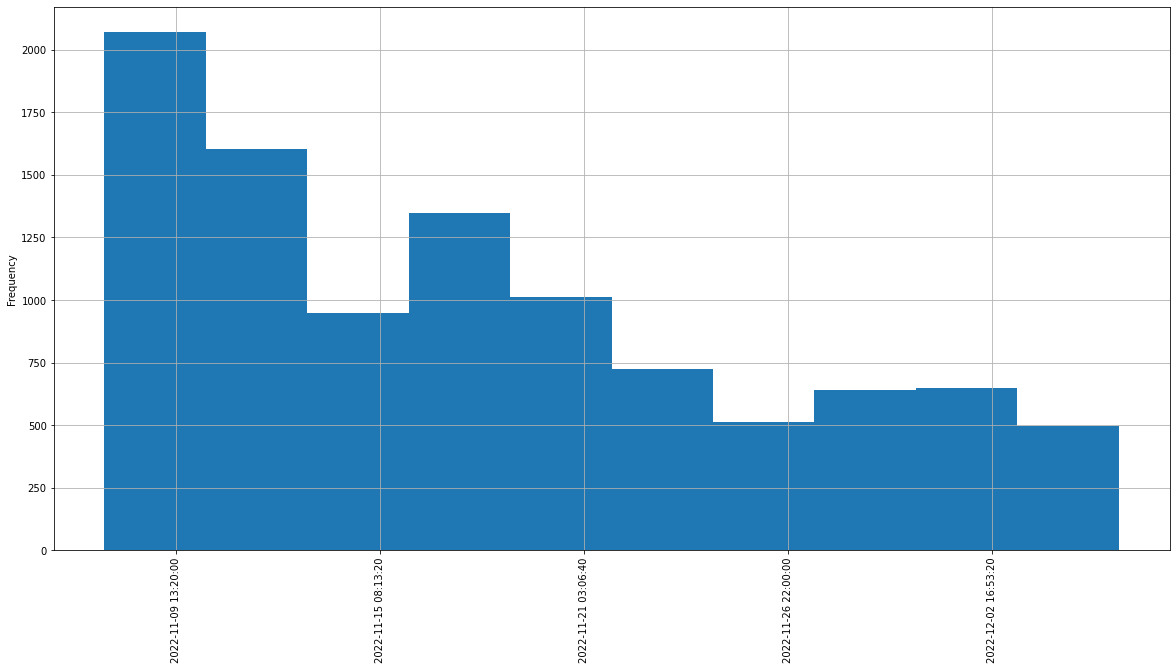

In [ ]:
# Histogram of Tweet Counts over retrieved datetime range

_ = fig, ax = plt.subplots()
_ = data_df["datetime"].astype(np.int64).plot.hist(ax=ax)
_ = labels = ax.get_xticks().tolist()
_ = labels = pd.to_datetime(labels)
_ = ax.set_xticklabels(labels, rotation=90)
_ = plt.grid()
_ = plt.show();

In [ ]:
data_df.head()

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id
9999,2022-11-07 12:52:15+00:00,1589601624531423233,"I love how we add ""gate"" to every scandal out ...",DirtyDryIce,0,0,0,0,None,None
9998,2022-11-07 12:53:27+00:00,1589601928870514690,the thing I find most hilarious about a migrat...,elfexgirlfriend,1,0,4,0,None,None
9997,2022-11-07 12:53:28+00:00,1589601932364361728,While elon musk said 'comedy is now legal' fol...,psalm7115,0,0,1,0,None,None
9996,2022-11-07 12:54:35+00:00,1589602211533066246,Musk’s $44 billion acquisition deal piled Twit...,AnneHandler,0,0,0,0,None,None
9995,2022-11-07 12:56:12+00:00,1589602618015449090,EsensConsulting: #Decentralized : #Mastodon re...,Guillaume_GCH,0,0,0,1,None,None


In [ ]:
# Save raw tweets

# end_date = end_date.split('.')[0]  # If cells executed out of order, this can grow a suffix .csv.csv...

filename_tweets = f'tweets_raw_{slugify(search_term)}_{start_retrieve_date}_{end_retrieve_date}.csv'
print(f'Saving to file: {filename_tweets}')

data_df.to_csv(filename_tweets, index=False)

files.download(filename_tweets)

Saving to file: tweets_raw_twitter-acquisition_2022-11-07_12-52-15_2022-12-06_07-15-49.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_df.head()
data_df.info()

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id
9999,2022-11-07 12:52:15+00:00,1589601624531423233,"I love how we add ""gate"" to every scandal out ...",DirtyDryIce,0,0,0,0,None,None
9998,2022-11-07 12:53:27+00:00,1589601928870514690,the thing I find most hilarious about a migrat...,elfexgirlfriend,1,0,4,0,None,None
9997,2022-11-07 12:53:28+00:00,1589601932364361728,While elon musk said 'comedy is now legal' fol...,psalm7115,0,0,1,0,None,None
9996,2022-11-07 12:54:35+00:00,1589602211533066246,Musk’s $44 billion acquisition deal piled Twit...,AnneHandler,0,0,0,0,None,None
9995,2022-11-07 12:56:12+00:00,1589602618015449090,EsensConsulting: #Decentralized : #Mastodon re...,Guillaume_GCH,0,0,0,1,None,None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9999 to 0
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  object             
 3   username      10000 non-null  object             
 4   reply_ct      10000 non-null  int64              
 5   retweet_ct    10000 non-null  int64              
 6   like_ct       10000 non-null  int64              
 7   quote_ct      10000 non-null  int64              
 8   retweeted_id  0 non-null      object             
 9   quoted_id     701 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 859.4+ KB


## OPTION (b): Upload Raw Textfile

In [ ]:
%%time

# NOTE: 1m07s

# Upload Plain Text File
uploaded = files.upload()
datafile_name = ''

# NOTE: Allows for multiple file uploads, will only process the last
#       Left in for future feature addition (processing multiple files at once)

print(f"Tweet raw datafile should have been created with this notebook with the filename format:")
print(f"   tweets_raw_<search_term>_<start_date>-<end_date>.csv")
print(f"   e.g. 'tweets_raw_elonmusk_2022-10-01_2022-12-04.csv'\n\n")

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  datafile_name = fn

# Parse raw tweet datafile filename to extract key search parameters
try:
  word1, word2, file_search_term, file_start_date, file_end_date = datafile_name.split('_')
  if (word1 =='tweets') & (word2 == 'raw'):
    search_term = file_search_term
    start_date = file_start_date
    end_date = file_end_date.split('.')[0]  # trim '.csv' suffix
    print(f'\n\nSearch Term: {search_term}\n  start_date: {start_date}\n  end_date: {end_date}\n\n')
  else:
    print(f'ILLEGAL FILENAME: {datafile_name}\n  Tweets datafile name must begin with prefix [tweets_raw_]')
except:
  print(f'ILLEGAL FILENAME: {datafile_name}\n  cannot parse Tweets datafile name')

# Read raw tweet datafile into DataFrame 'data'
try:
  data = pd.read_csv(datafile_name)
except:
  print(f'ERROR: Tweets datafile cannot be read by pd.read_csv')

Saving tweets_raw_twitter-acquisition_2022-11-07_12-52-15_2022-12-06_07-15-49.csv to tweets_raw_twitter-acquisition_2022-11-07_12-52-15_2022-12-06_07-15-49 (1).csv
Tweet raw datafile should have been created with this notebook with the filename format:
   tweets_raw_<search_term>_<start_date>-<end_date>.csv
   e.g. 'tweets_raw_elonmusk_2022-10-01_2022-12-04.csv'


User uploaded file "tweets_raw_twitter-acquisition_2022-11-07_12-52-15_2022-12-06_07-15-49.csv" with length 2801198 bytes
ILLEGAL FILENAME: tweets_raw_twitter-acquisition_2022-11-07_12-52-15_2022-12-06_07-15-49.csv
  cannot parse Tweets datafile name
CPU times: user 457 ms, sys: 65.6 ms, total: 523 ms
Wall time: 54.6 s


In [ ]:
datafile_name

'tweets_raw_twitter-acquisition_2022-11-07_12-52-15_2022-12-06_07-15-49.csv'

In [ ]:
!ls -altr $datafile_name

-rw-r--r-- 1 root root 2801198 Dec  6 07:45 tweets_raw_twitter-acquisition_2022-11-07_12-52-15_2022-12-06_07-15-49.csv


In [ ]:
!head -n 10 $datafile_name

datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id
2022-11-07 12:52:15+00:00,1589601624531423233,"I love how we add ""gate"" to every scandal out there no matter how insignificant it is but nobody wants to call the Twitter acquisition #Elongate because that would come dangerously close to giving him a compliment.",DirtyDryIce,0,0,0,0,,
2022-11-07 12:53:27+00:00,1589601928870514690,the thing I find most hilarious about a migration to tumblr is that half my friends left tumblr for twitter during ITS unfortunate acquisition and subsequent purging of NSFW content to make it more appealing to advertisers.,elfexgirlfriend,1,0,4,0,,
2022-11-07 12:53:28+00:00,1589601932364361728,"While elon musk said 'comedy is now legal' following his acquisition of Twitter, jokes about the new owner and criticism over his takeover are getting users blocked and suspended.
https://t.co/zgR8dCex6a",psalm7115,0,0,1,0,,
2022-11-07 12:54:35+00:00,1589602211533066246,"Musk’s $44 

In [ ]:
# Read raw tweet datafile into DataFrame 'data'
try:
  headers = ['datetime','id','tweet','username','reply_ct','retweet_ct','like_ct','quote_ct','retweeted_id','quoted_id']
  dtypes = {'datetime':'str',
            'id':'int',
            'tweet':'string',
            'username':'string',
            'reply_ct':'int',
            'retweet_ct':'int',
            'like_ct':'int',
            'quote_ct':'int',
            'retweeted_id':'string',
            'quoted_id':'string'}
  parse_dates = ['datetime']
  data_df = pd.read_csv(datafile_name, skiprows=[0], names=headers, dtype=dtypes, parse_dates=parse_dates, index_col=None)
  data_df.head()
  data_df.info()
except:
  print(f'ERROR: Tweets datafile cannot be read by pd.read_csv')

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id
0,2022-11-07 12:52:15+00:00,1589601624531423233,"I love how we add ""gate"" to every scandal out ...",DirtyDryIce,0,0,0,0,<NA>,<NA>
1,2022-11-07 12:53:27+00:00,1589601928870514690,the thing I find most hilarious about a migrat...,elfexgirlfriend,1,0,4,0,<NA>,<NA>
2,2022-11-07 12:53:28+00:00,1589601932364361728,While elon musk said 'comedy is now legal' fol...,psalm7115,0,0,1,0,<NA>,<NA>
3,2022-11-07 12:54:35+00:00,1589602211533066246,Musk’s $44 billion acquisition deal piled Twit...,AnneHandler,0,0,0,0,<NA>,<NA>
4,2022-11-07 12:56:12+00:00,1589602618015449090,EsensConsulting: #Decentralized : #Mastodon re...,Guillaume_GCH,0,0,0,1,<NA>,<NA>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  string             
 3   username      10000 non-null  string             
 4   reply_ct      10000 non-null  int64              
 5   retweet_ct    10000 non-null  int64              
 6   like_ct       10000 non-null  int64              
 7   quote_ct      10000 non-null  int64              
 8   retweeted_id  0 non-null      string             
 9   quoted_id     701 non-null    string             
dtypes: datetime64[ns, UTC](1), int64(5), string(4)
memory usage: 781.4 KB


In [ ]:
# Calculate Data Range
print(f'Tweet Dataset Retrieved:\n')

# start_retrieve_date = data_df.datetime.min().strftime('%Y-%m-%d-%H:%M:%S')
# end_retrieve_date = data_df.datetime.max().strftime('%Y-%m-%d-%H:%M:%S')
start_retrieve_date = data_df.datetime.min().strftime('%Y-%m-%d_%H-%M-%S')
end_retrieve_date = data_df.datetime.max().strftime('%Y-%m-%d_%H-%M-%S')

print(f' Raw Tweet Count: {data_df.shape[0]}')
print('\n')
print(f'      First Date: {start_retrieve_date} (vs start_target_date: {start_target_date})')
print(f'       Last Date: {end_retrieve_date} (vs end_target_date: {end_target_date})')
print('\n')
print(f'   ReTweet Count: {data_df.retweeted_id.count().sum()}')
print(f'    Quoted Count: {data_df.quoted_id.count().sum()}')
print('\n')
print(f'     Reply %: {100*data_df.reply_ct.count().sum()/data_df.shape[0]:.2f}%')
print(f'   ReTweet %: {100*data_df.retweet_ct.count().sum()/data_df.shape[0]:.2f}%')
print(f'      Like %: {100*data_df.like_ct.count().sum()/data_df.shape[0]:.2f}%')
print(f'     Quote %: {100*data_df.quote_ct.count().sum()/data_df.shape[0]:.2f}%')

print('\n')

Tweet Dataset Retrieved:

 Raw Tweet Count: 10000


      First Date: 2022-11-07_12-52-15 (vs start_target_date: 2022-11-01)
       Last Date: 2022-12-06_07-15-49 (vs end_target_date: 2022-11-14)


   ReTweet Count: 0
    Quoted Count: 701


     Reply %: 100.00%
   ReTweet %: 100.00%
      Like %: 100.00%
     Quote %: 100.00%




## OPTION (c): Read from gDrive

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive

In [ ]:
# drive.mount("/gdrive", force_remount=True)

In [ ]:
# CUSTOMIZE: set GDrive path below

%cd ./MyDrive/courses/code/
!pwd
!ls -altr

In [ ]:
#@title Enter Datafile Name 


datafile_name = "" #@param {type:"string"}

'tweets_raw_twitter-acquisition_2022-11-07_12-52-15_2022-12-06_07-15-49.csv'

In [ ]:
!ls -altr $datafile_name

-rw-r--r-- 1 root root 2801198 Dec  6 07:45 tweets_raw_twitter-acquisition_2022-11-07_12-52-15_2022-12-06_07-15-49.csv


In [ ]:
!head -n 10 $datafile_name

datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id
2022-11-07 12:52:15+00:00,1589601624531423233,"I love how we add ""gate"" to every scandal out there no matter how insignificant it is but nobody wants to call the Twitter acquisition #Elongate because that would come dangerously close to giving him a compliment.",DirtyDryIce,0,0,0,0,,
2022-11-07 12:53:27+00:00,1589601928870514690,the thing I find most hilarious about a migration to tumblr is that half my friends left tumblr for twitter during ITS unfortunate acquisition and subsequent purging of NSFW content to make it more appealing to advertisers.,elfexgirlfriend,1,0,4,0,,
2022-11-07 12:53:28+00:00,1589601932364361728,"While elon musk said 'comedy is now legal' following his acquisition of Twitter, jokes about the new owner and criticism over his takeover are getting users blocked and suspended.
https://t.co/zgR8dCex6a",psalm7115,0,0,1,0,,
2022-11-07 12:54:35+00:00,1589602211533066246,"Musk’s $44 

In [ ]:
# Read raw tweet datafile into DataFrame 'data'
try:
  headers = ['datetime','id','tweet','username','reply_ct','retweet_ct','like_ct','quote_ct','retweeted_id','quoted_id']
  dtypes = {'datetime':'str',
            'id':'int',
            'tweet':'string',
            'username':'string',
            'reply_ct':'int',
            'retweet_ct':'int',
            'like_ct':'int',
            'quote_ct':'int',
            'retweeted_id':'string',
            'quoted_id':'string'}
  parse_dates = ['datetime']
  data_df = pd.read_csv(datafile_name, skiprows=[0], names=headers, dtype=dtypes, parse_dates=parse_dates, index_col=None)
  data_df.head()
  data_df.info()
except:
  print(f'ERROR: Tweets datafile cannot be read by pd.read_csv')

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id
0,2022-11-07 12:52:15+00:00,1589601624531423233,"I love how we add ""gate"" to every scandal out ...",DirtyDryIce,0,0,0,0,<NA>,<NA>
1,2022-11-07 12:53:27+00:00,1589601928870514690,the thing I find most hilarious about a migrat...,elfexgirlfriend,1,0,4,0,<NA>,<NA>
2,2022-11-07 12:53:28+00:00,1589601932364361728,While elon musk said 'comedy is now legal' fol...,psalm7115,0,0,1,0,<NA>,<NA>
3,2022-11-07 12:54:35+00:00,1589602211533066246,Musk’s $44 billion acquisition deal piled Twit...,AnneHandler,0,0,0,0,<NA>,<NA>
4,2022-11-07 12:56:12+00:00,1589602618015449090,EsensConsulting: #Decentralized : #Mastodon re...,Guillaume_GCH,0,0,0,1,<NA>,<NA>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  string             
 3   username      10000 non-null  string             
 4   reply_ct      10000 non-null  int64              
 5   retweet_ct    10000 non-null  int64              
 6   like_ct       10000 non-null  int64              
 7   quote_ct      10000 non-null  int64              
 8   retweeted_id  0 non-null      string             
 9   quoted_id     701 non-null    string             
dtypes: datetime64[ns, UTC](1), int64(5), string(4)
memory usage: 781.4 KB


In [ ]:
# Calculate Data Range
print(f'Tweet Dataset Retrieved:\n')

# start_retrieve_date = data_df.datetime.min().strftime('%Y-%m-%d-%H:%M:%S')
# end_retrieve_date = data_df.datetime.max().strftime('%Y-%m-%d-%H:%M:%S')
start_retrieve_date = data_df.datetime.min().strftime('%Y-%m-%d_%H-%M-%S')
end_retrieve_date = data_df.datetime.max().strftime('%Y-%m-%d_%H-%M-%S')

print(f' Raw Tweet Count: {data_df.shape[0]}')
print('\n')
print(f'      First Date: {start_retrieve_date} (vs start_target_date: {start_target_date})')
print(f'       Last Date: {end_retrieve_date} (vs end_target_date: {end_target_date})')
print('\n')
print(f'   ReTweet Count: {data_df.retweeted_id.count().sum()}')
print(f'    Quoted Count: {data_df.quoted_id.count().sum()}')
print('\n')
print(f'     Reply %: {100*data_df.reply_ct.count().sum()/data_df.shape[0]:.2f}%')
print(f'   ReTweet %: {100*data_df.retweet_ct.count().sum()/data_df.shape[0]:.2f}%')
print(f'      Like %: {100*data_df.like_ct.count().sum()/data_df.shape[0]:.2f}%')
print(f'     Quote %: {100*data_df.quote_ct.count().sum()/data_df.shape[0]:.2f}%')

print('\n')

Tweet Dataset Retrieved:

 Raw Tweet Count: 10000


      First Date: 2022-11-07_12-52-15 (vs start_target_date: 2022-11-01)
       Last Date: 2022-12-06_07-15-49 (vs end_target_date: 2022-11-14)


   ReTweet Count: 0
    Quoted Count: 701


     Reply %: 100.00%
   ReTweet %: 100.00%
      Like %: 100.00%
     Quote %: 100.00%




# **Clean and Slice Strings**

Strategy:
1. Convert Unicode emojis to standard english words
2. Convert Emojicons (text/punctuation) to standard english words 
3. Convert Slang to standard english

Goals:
1. plain text of text_noemoji for Transformer models
2. simplified text of text_clean for simplier models (e.g. lexicon, stat ML)

In [ ]:
data_df.head()
data_df.info()

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id
0,2022-11-07 12:52:15+00:00,1589601624531423233,"I love how we add ""gate"" to every scandal out ...",DirtyDryIce,0,0,0,0,<NA>,<NA>
1,2022-11-07 12:53:27+00:00,1589601928870514690,the thing I find most hilarious about a migrat...,elfexgirlfriend,1,0,4,0,<NA>,<NA>
2,2022-11-07 12:53:28+00:00,1589601932364361728,While elon musk said 'comedy is now legal' fol...,psalm7115,0,0,1,0,<NA>,<NA>
3,2022-11-07 12:54:35+00:00,1589602211533066246,Musk’s $44 billion acquisition deal piled Twit...,AnneHandler,0,0,0,0,<NA>,<NA>
4,2022-11-07 12:56:12+00:00,1589602618015449090,EsensConsulting: #Decentralized : #Mastodon re...,Guillaume_GCH,0,0,0,1,<NA>,<NA>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  string             
 3   username      10000 non-null  string             
 4   reply_ct      10000 non-null  int64              
 5   retweet_ct    10000 non-null  int64              
 6   like_ct       10000 non-null  int64              
 7   quote_ct      10000 non-null  int64              
 8   retweeted_id  0 non-null      string             
 9   quoted_id     701 non-null    string             
dtypes: datetime64[ns, UTC](1), int64(5), string(4)
memory usage: 781.4 KB


In [ ]:
tweet_test_ls = [
    "?RT @justinbiebcr: The bigger the better....if you know what I mean ;)	negative",
    "Your busy schedule might not leave you a lot of room today for... More for Scorpio http://twittascope.com/twittascope/?sign=8",
    "In ny wif @DJWALLAH and the Heavy Hitter crew... shout to @freddyphh for looking real gay in the camera...lol...",
    "I finished my fourth can of Coke WTF.",
    "I don't give a shit about Valentines, i'm pissed that i have no access to the new Uffie album!!",
    "I got my pops whip right now and this nigga aint got NOOO heat. Smh",
    "RT @SunshynAndPain My tummy hurts =[ {hope you feel better} :) ;)",
    "I feel good, I knew that I would now ✋🏽😜🤚🏽"
]

In [ ]:
def clean_basic_str(dirty_str):
  '''
  STEP 1: Basic tweet text preprocessing
  '''

  contraction_expanded_str = contractions.fix(dirty_str)

  clean_str = clean(contraction_expanded_str,
      fix_unicode=True,               # fix various unicode errors
      to_ascii=True,                  # transliterate to closest ASCII representation
      lower=False,                     # lowercase text
      no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
      no_urls=True,                  # replace all URLs with a special token
      no_emails=True,                # replace all email addresses with a special token
      no_phone_numbers=True,         # replace all phone numbers with a special token
      no_numbers=False,               # replace all numbers with a special token
      no_digits=False,                # replace all digits with a special token
      no_currency_symbols=False,      # replace all currency symbols with a special token
      no_punct=False,                 # remove punctuations
      # replace_with_punct="",          # instead of removing punctuations you may replace them
      # replace_with_url="<URL>",
      # replace_with_email="<EMAIL>",
      # replace_with_phone_number="<PHONE>",
      # replace_with_number="<NUMBER>",
      # replace_with_digit="0",
      # replace_with_currency_symbol="<CUR>",
      lang="en"                       # set to 'de' for German special handling
  )

  # Replace all new lines/returns with single whitespace
  clean_str = ' '.join(clean_str.split())
  # clean_str = clean_str.replace('\n\r', ' ')
  # clean_str = clean_str.replace('\n', ' ')
  # clean_str = clean_str.replace('\r', ' ')
  # clean_str = ' '.join(clean_str.split())

  # Strip unpaired leading/trailing quotes
  if (clean_str.count('"') % 2 == 1):
    clean_str = clean_str.strip('"')
  if (clean_str.count("'") % 2 == 1):
    clean_str = clean_str.strip("'")

  return clean_str 

# Test

clean_basic_str("This \n\n\n is a very dirty DIRTY StrInG!!")
clean_basic_str('"up!')
clean_basic_str('"Watch out!" he said.')

'This is a very dirty DIRTY StrInG!!'

'up!'

'"Watch out!" he said.'

In [ ]:
def translate_emoji(raw_str):
  '''
  STEP 2: Convert emoji/emoticons to plain english words
  '''

  # Translate Unicode icon emoji to english words
  emoji2txt_str = emoji.demojize(raw_str) # , delimiters='') # .replace('_',' '))

  # Translate text/punctuation emojicons [e.g. ;) :smirk:] to english words
  emoji2txt_str = emoticon_fix.emoticon_fix(emoji2txt_str)

  # Perform basic text preprocessing
  emoji2txt_str = clean_basic_str(emoji2txt_str)  # Execute STEP 1: basic preprocessing
  emoji2txt_str = emoji2txt_str.replace('_', ' ')
  emoji2txt_str = emoji2txt_str.replace(':',' ')
  emoji2txt_str = " ".join(emoji2txt_str.split())
  
  return emoji2txt_str

# Test

translate_emoji("I feel good, I knew that I would now ✋🏽😜🤚🏽")

'I feel good , I knew that I would now raised hand medium skin tone winking face with tongue raised back of hand medium skin tone'

In [ ]:
# Test

emoticon_fix.emoticon_fix('Hi :o :) ;)').replace('_',' ')

'Hi : o Smile Smirk'

In [ ]:
# Test clean_basic_str()

clean_basic_ls = []

for i,atweet in enumerate(tweet_test_ls):
  clean_tweet = clean_basic_str(atweet)
  print(f"ORIGINAL: {atweet}\n   CLEAN: {clean_tweet}\n\n")
  # print(f"    CODE: {chardet.detect(atweet)}")
  clean_basic_ls.append(clean_tweet)

ORIGINAL: ?RT @justinbiebcr: The bigger the better....if you know what I mean ;)	negative
   CLEAN: ?RT @justinbiebcr: The bigger the better....if you know what I mean ;) negative


ORIGINAL: Your busy schedule might not leave you a lot of room today for... More for Scorpio http://twittascope.com/twittascope/?sign=8
   CLEAN: Your busy schedule might not leave you a lot of room today for... More for Scorpio <URL>


ORIGINAL: In ny wif @DJWALLAH and the Heavy Hitter crew... shout to @freddyphh for looking real gay in the camera...lol...
   CLEAN: In ny wif @DJWALLAH and the Heavy Hitter crew... shout to @freddyphh for looking real gay in the camera...lol...


ORIGINAL: I finished my fourth can of Coke WTF.
   CLEAN: I finished my fourth can of Coke WTF.


ORIGINAL: I don't give a shit about Valentines, i'm pissed that i have no access to the new Uffie album!!
   CLEAN: I do not give a shit about Valentines, i am pissed that i have no access to the new Uffie album!!


ORIGINAL: I got my 

In [ ]:
# Required for STEP 3 (techniques.py): NLTK for tokenization

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Required for STEP 3: spaCy for lemmatization

import spacy

nlp = spacy.load('en_core_web_sm')

# Test

doc = nlp('did displaying words')
print(" ".join([token.lemma_ for token in doc]))

do display word


In [ ]:
# Step 3: Advanced Tweet Preprocessing on text_intermed with techniques.py
# https://github.com/Deffro/text-preprocessing-techniques/blob/master/preprocess.py
# TODO: rip this out entirely and replace inline

def clean_adv_str(text_str):
  '''
  STEP 3: Advanced Tweet text preprocessing
  '''
  
  text_str = text_str.strip()

  # Convert encoding to printable ASCII
  # text_str = text_str.encode("ascii", "ignore")  

  # Remove URLs
  text_str = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text_str)
  text_str = re.sub(r'#([^\s]+)', r'\1', text_str)

  # Remove @User
  text_str = re.sub('@[^\s]+',' ',text_str)

  # Remove # infront of hash tag words
  text_str = re.sub(r'#([^\s]+)', r'\1', text_str)

  # totalSlangs = 0
  # totalSlangsFound = []
  temp_slangs, temp_slangsFound = countSlang(text_str)
  # totalSlangs += temp_slangs # total slangs for all sentences
  # for word in temp_slangsFound:
  #     totalSlangsFound.append(word) # all the slangs found in all sentences
 
  text_str = replaceSlang(text_str) # Technique 2: replaces slang words and abbreviations with their equivalents


  text_str = replaceContraction(text_str) # Technique 3: replaces contractions to their equivalents


  # Remove Numbers
  text_str = removeNumbers(text_str) # Technique 4: remove integers from text

  # Remove Punctuation
  # text_str = removePunctuation(text_str) 
  # text_str = text_str.decode('ascii')

  doc = nlp(text_str)
  # Convert tokens to lemmas and filter out stopwords
  text_str = (" ".join([token.lemma_ for token in doc if not token.is_stop]))
  # Convert to lowercase
  text_str = text_str.lower()
  # Filter out punctuation
  text_str = text_str.translate(str.maketrans('', '', string.punctuation))
  # Collapse multiple whitespaces
  text_str = " ".join(text_str.split())

  return text_str

In [ ]:
%%time

# NOTE:    42s on Sun 20221204 at 15:44PM EST on Colab Pro T4 on 5k Tweets
#        2m10s onTue 20221204 at 03:15AM EST on Colab Pro T4 on 10k Tweets

# Create data_df to hold text sentences and corresponding sentiment values

# Step 1-2: Convert unicode emojis and text/punctuation of emojicons to plain english words for all models (save in text_noemoji)

# data_df = pd.DataFrame({'text_raw': novel_sentences_ls})

# STEP 1: Basic Twitter text preprocessing
# currently embedded within translate_emoji() due to emoji2txt additions ':' and '_' removal
data_df['text_raw'] = data_df['tweet']

# STEP 2: Translate Unicode icon emoji and text/punctuation emoticons to english words
data_df['text_noemoji'] = data_df['text_raw'].apply(lambda x: translate_emoji(x)) 
# This 'text_noemoji' version of tweet is fed into advanced SOTA Transformer models that can exploit richer context

# STEP 3: Advanced Twitter text preprocessing
data_df['text_clean'] = data_df['text_noemoji'].apply(lambda x: clean_adv_str(x)) 
# This 'text_clean' version of tweet is fed into simplier sentiment models that depend more on normalized feature engineering (e.g. lexicons, stat ML)

data_df.iloc[50:70]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  string             
 3   username      10000 non-null  string             
 4   reply_ct      10000 non-null  int64              
 5   retweet_ct    10000 non-null  int64              
 6   like_ct       10000 non-null  int64              
 7   quote_ct      10000 non-null  int64              
 8   retweeted_id  0 non-null      string             
 9   quoted_id     701 non-null    string             
 10  text_raw      10000 non-null  string             
 11  text_noemoji  10000 non-null  object             
 12  text_clean    10000 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(5), object(2), string(5)
memo

In [ ]:
data_df.head()

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id,text_raw,text_noemoji,text_clean
0,2022-11-07 12:52:15+00:00,1589601624531423233,"I love how we add ""gate"" to every scandal out ...",DirtyDryIce,0,0,0,0,<NA>,<NA>,"I love how we add ""gate"" to every scandal out ...","I love how we add "" gate "" to every scandal ou...",love add gate scandal matter insignificant wan...
1,2022-11-07 12:53:27+00:00,1589601928870514690,the thing I find most hilarious about a migrat...,elfexgirlfriend,1,0,4,0,<NA>,<NA>,the thing I find most hilarious about a migrat...,the thing I find most hilarious about a migrat...,thing find hilarious migration tumblr half fri...
2,2022-11-07 12:53:28+00:00,1589601932364361728,While elon musk said 'comedy is now legal' fol...,psalm7115,0,0,1,0,<NA>,<NA>,While elon musk said 'comedy is now legal' fol...,While elon musk said ' comedy is now legal ' f...,elon musk say comedy legal follow acquisition ...
3,2022-11-07 12:54:35+00:00,1589602211533066246,Musk’s $44 billion acquisition deal piled Twit...,AnneHandler,0,0,0,0,<NA>,<NA>,Musk’s $44 billion acquisition deal piled Twit...,Musk ' s $ 44 billion acquisition deal piled T...,musk s billion acquisition deal pile twitter b...
4,2022-11-07 12:56:12+00:00,1589602618015449090,EsensConsulting: #Decentralized : #Mastodon re...,Guillaume_GCH,0,0,0,1,<NA>,<NA>,EsensConsulting: #Decentralized : #Mastodon re...,EsensConsulting #Decentralized #Mastodon recor...,esensconsulting decentralize mastodon record k...


In [ ]:
# Save 

filename_clean_tweets = f'tweets_clean_{slugify(search_term)}_{start_retrieve_date}_{end_retrieve_date}.csv'
print(f'Saving to file: {filename_clean_tweets}')

data_df.to_csv(filename_clean_tweets, index=False)

files.download(filename_clean_tweets)

Saving to file: tweets_clean_twitter-acquisition_2022-11-07_12-52-15_2022-12-06_07-15-49.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# SKIP to next Section: Sentiment Analysis

## [SKIP] Manually process slang translation

In [ ]:
!wget https://raw.githubusercontent.com/Deffro/text-preprocessing-techniques/master/slang.txt

--2022-12-04 21:47:37--  https://raw.githubusercontent.com/Deffro/text-preprocessing-techniques/master/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5181 (5.1K) [text/plain]
Saving to: ‘slang.txt.1’

slang.txt.1         100%[===================>]   5.06K  --.-KB/s    in 0s      

2022-12-04 21:47:37 (52.4 MB/s) - ‘slang.txt.1’ saved [5181/5181]



In [ ]:
!ls

corporaForSpellCorrection.txt  ss-twitterfinal.txt
preprocess.py		       techniques.py
__pycache__		       tweets_clean_elonmusk_2022-10-01_2022-12-04.csv
README.md		       tweets_elonmusk_2022-10-01-2022-12-04.csv
slang.txt		       tweets_raw_elonmusk_2022-10-01_2022-12-04.csv
slang.txt.1


In [ ]:
fwidths = [6,40]

# slang_df = pd.read_fwf('slang.txt', widths = fwidths, names = ['slang', 'slang_translated'])
slang_df = pd.read_csv('slang.txt', sep='\t', header=None) # ['slang','slang_translation']) # , lineterminator='\r')
slang_df.columns = ['slang','slang_translation']
slang_df.head()

,slang,slang_translation
0,2day,today
1,2nite,tonight
2,4u,for you
3,4ward,forward
4,a3,"anyplace, anywhere, anytime"


In [ ]:
len(slang_dt)

289

In [ ]:
slang_df.set_index("slang", drop=True, inplace=True)
slang_dt = {k: g.iloc[0]['slang_translation'] for k,g in slang_df.groupby('slang')}
pprint(slang_dt)

{'2day': 'today',
 '2nite': 'tonight',
 '4u': 'for you',
 '4ward': 'forward',
 'a/n': 'author note',
 'a/s/l': 'age, sex, location',
 'a/w': 'anyway',
 'a3': 'anyplace, anywhere, anytime',
 'adn': 'any day now',
 'afaic': "as far as i'm concerned",
 'afaik': 'as far as I know',
 'afk': 'away from keyboard',
 'aggro': 'aggresive',
 'aight': 'alright',
 'airhead': 'stupid',
 'aka': 'as known as',
 'alol': 'actually laughing out loud',
 'amigo': 'friend',
 'amz': 'amazing',
 'app': 'application',
 'armpit': 'undesirable',
 'asap': 'as soon as possible',
 'atm': 'at the moment',
 'atw': 'all the way',
 'b-day': 'birthday',
 'b/c': 'because',
 'b4': 'before',
 'b4n': 'bye for now',
 'bae': 'before anyone else',
 'bak': 'back at the keyboard',
 'bbl': 'bee back later',
 'bday': 'birthday',
 'becuz': 'because',
 'bent': 'angry',
 'bestie': 'best friend',
 'besty': 'best friend',
 'bf': 'boyfriend',
 'bff': 'best friends forever',
 'bffe': 'best friends forever',
 'bfn': 'bye for now',
 'bg': 

In [ ]:
slang_str = 'yolo'

print(f'[{slang_str}] translates to [{slang_dt[slang_str]}]')

[yolo] translates to [you only live once]


# **Sentiment Analysis**

## VADER

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 35.7 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_sa = SentimentIntensityAnalyzer()

# Test

vader_sa.polarity_scores('I love lint')['compound']

0.6369

In [ ]:
data_df['vader'] = data_df['text_clean'].apply(lambda x : vader_sa.polarity_scores(x)['compound'])
data_df.head(5)

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id,text_raw,text_noemoji,text_clean,vader
0,2022-11-07 12:52:15+00:00,1589601624531423233,"I love how we add ""gate"" to every scandal out ...",DirtyDryIce,0,0,0,0,<NA>,<NA>,"I love how we add ""gate"" to every scandal out ...","I love how we add "" gate "" to every scandal ou...",love add gate scandal matter insignificant wan...,0.1027
1,2022-11-07 12:53:27+00:00,1589601928870514690,the thing I find most hilarious about a migrat...,elfexgirlfriend,1,0,4,0,<NA>,<NA>,the thing I find most hilarious about a migrat...,the thing I find most hilarious about a migrat...,thing find hilarious migration tumblr half fri...,0.4019
2,2022-11-07 12:53:28+00:00,1589601932364361728,While elon musk said 'comedy is now legal' fol...,psalm7115,0,0,1,0,<NA>,<NA>,While elon musk said 'comedy is now legal' fol...,While elon musk said ' comedy is now legal ' f...,elon musk say comedy legal follow acquisition ...,-0.4404
3,2022-11-07 12:54:35+00:00,1589602211533066246,Musk’s $44 billion acquisition deal piled Twit...,AnneHandler,0,0,0,0,<NA>,<NA>,Musk’s $44 billion acquisition deal piled Twit...,Musk ' s $ 44 billion acquisition deal piled T...,musk s billion acquisition deal pile twitter b...,0.4588
4,2022-11-07 12:56:12+00:00,1589602618015449090,EsensConsulting: #Decentralized : #Mastodon re...,Guillaume_GCH,0,0,0,1,<NA>,<NA>,EsensConsulting: #Decentralized : #Mastodon re...,EsensConsulting #Decentralized #Mastodon recor...,esensconsulting decentralize mastodon record k...,0.2500
5,2022-11-07 12:56:28+00:00,1589602685950758912,Same! Twitter and Romance Novels have been my ...,ceruleanvixen,0,1,10,0,<NA>,https://twitter.com/wagatwe/status/15892860352...,Same! Twitter and Romance Novels have been my ...,Same ! Twitter and Romance Novels have been my...,twitter romance novels main source growth know...,0.9169
6,2022-11-07 12:58:06+00:00,1589603096308912128,@elonmusk @jack I had tried writing to Twitter...,mananchauhan,2,0,4,0,<NA>,<NA>,@elonmusk @jack I had tried writing to Twitter...,@elonmusk @jack I had tried writing to Twitter...,try write twitter boss problem truth problem h...,-0.1779
7,2022-11-07 13:07:31+00:00,1589605466132578304,Apologize &lt;&gt; embrace spectrum with regar...,jhscott,1,0,7,0,<NA>,<NA>,Apologize &lt;&gt; embrace spectrum with regar...,Apologize < > embrace spectrum with regards to...,apologize embrace spectrum regard westrum path...,0.6249
8,2022-11-07 13:07:36+00:00,1589605486436884485,"Changpeng Zhao, founder and CEO of Binance, ta...",Michael63772566,0,0,0,0,<NA>,<NA>,"Changpeng Zhao, founder and CEO of Binance, ta...","Changpeng Zhao , founder and CEO of Binance , ...",changpeng zhao founder ceo binance talk suppor...,0.4019
9,2022-11-07 13:08:07+00:00,1589605617831919616,"After Elon Musk's acquisition of Twitter, at t...",tcitnews1,1,0,0,0,<NA>,<NA>,"After Elon Musk's acquisition of Twitter, at t...","After Elon Musk's acquisition of Twitter , at ...",elon musk acquisition twitter end month user a...,0.0000


## TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")

# Test
print(testimonial.sentiment.polarity)

0.39166666666666666


In [ ]:
data_df['textblob'] = data_df['text_clean'].apply(lambda x : TextBlob(x).sentiment.polarity)
data_df.head()

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id,text_raw,text_noemoji,text_clean,vader,textblob
0,2022-11-07 12:52:15+00:00,1589601624531423233,"I love how we add ""gate"" to every scandal out ...",DirtyDryIce,0,0,0,0,<NA>,<NA>,"I love how we add ""gate"" to every scandal out ...","I love how we add "" gate "" to every scandal ou...",love add gate scandal matter insignificant wan...,0.1027,-0.050000
1,2022-11-07 12:53:27+00:00,1589601928870514690,the thing I find most hilarious about a migrat...,elfexgirlfriend,1,0,4,0,<NA>,<NA>,the thing I find most hilarious about a migrat...,the thing I find most hilarious about a migrat...,thing find hilarious migration tumblr half fri...,0.4019,0.066667
2,2022-11-07 12:53:28+00:00,1589601932364361728,While elon musk said 'comedy is now legal' fol...,psalm7115,0,0,1,0,<NA>,<NA>,While elon musk said 'comedy is now legal' fol...,While elon musk said ' comedy is now legal ' f...,elon musk say comedy legal follow acquisition ...,-0.4404,0.168182
3,2022-11-07 12:54:35+00:00,1589602211533066246,Musk’s $44 billion acquisition deal piled Twit...,AnneHandler,0,0,0,0,<NA>,<NA>,Musk’s $44 billion acquisition deal piled Twit...,Musk ' s $ 44 billion acquisition deal piled T...,musk s billion acquisition deal pile twitter b...,0.4588,0.000000
4,2022-11-07 12:56:12+00:00,1589602618015449090,EsensConsulting: #Decentralized : #Mastodon re...,Guillaume_GCH,0,0,0,1,<NA>,<NA>,EsensConsulting: #Decentralized : #Mastodon re...,EsensConsulting #Decentralized #Mastodon recor...,esensconsulting decentralize mastodon record k...,0.2500,0.042424


## DistilBERT

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

In [ ]:
# Load tokenizer and model, create trainer

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Create class for data preparation

class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [ ]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_distilbert_sentiment(text_clean_ls, sample_size=10):
  # text_clean_ls = text_sentiment_dt['cdickins_achristmascarol']['text_clean'].to_list()
  # text_clean_ls = text_sentiment_dt['cdickins_achristmascarol']['text_clean'].to_list()

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Create DataFrame with texts, predictions, labels, and scores
  # line_no_ls = list(range(len(sentiment_ls)))
  # distilbert_df = pd.DataFrame(list(zip(line_no_ls, text_clean_ls,sentiment_ls,label_ls,score_ls)), columns=['line_no','line','sentiment','label','score'])
  # distilbert_df.head()

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_signed_ls = [ascore if alabel.lower().strip()=='positive' else (-1.0*ascore) for alabel, ascore in label_score_ls] 

  # print(f'label_ls:\n  {label_ls[:sample_size]}')
  # print(f'score_ls:\n {score_ls[:sample_size]}')

  return sentiment_signed_ls, label_ls

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [ ]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.']
sentiment_signed_ls, label_ls = get_distilbert_sentiment(line_ls)

print(f'sentiment_signed_ls:\n  {sentiment_signed_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 4
  Batch size = 8


sentiment_signed_ls:
  [0.9998562, -0.9997524619102478, 0.9998695, 0.9502347]
label_ls:
  0    POSITIVE
1    NEGATIVE
2    POSITIVE
3    POSITIVE
dtype: object


In [ ]:
%%time

# NOTE:    13s on Sun 20221204 @ 17:00AM EST Colab Pro T4 over 5k Tweets
#          48s on Tue 20221206 @ 03:20AM EST Colab Pro T4 over 10k Tweets

text_clean_ls = data_df['text_clean'].to_list()
sentiment_ls, label_ls = get_distilbert_sentiment(text_clean_ls)

data_df['distilbert'] = sentiment_ls
data_df.head()
data_df.info()

***** Running Prediction *****
  Num examples = 10000
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  string             
 3   username      10000 non-null  string             
 4   reply_ct      10000 non-null  int64              
 5   retweet_ct    10000 non-null  int64              
 6   like_ct       10000 non-null  int64              
 7   quote_ct      10000 non-null  int64              
 8   retweeted_id  0 non-null      string             
 9   quoted_id     701 non-null    string             
 10  text_raw      10000 non-null  string             
 11  text_noemoji  10000 non-null  object             
 12  text_clean    10000 non-null  object             
 13  vader         10000 non-null  float64            
 14  textblo

In [ ]:
data_df.head()

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id,text_raw,text_noemoji,text_clean,vader,textblob,distilbert
0,2022-11-07 12:52:15+00:00,1589601624531423233,"I love how we add ""gate"" to every scandal out ...",DirtyDryIce,0,0,0,0,<NA>,<NA>,"I love how we add ""gate"" to every scandal out ...","I love how we add "" gate "" to every scandal ou...",love add gate scandal matter insignificant wan...,0.1027,-0.050000,0.952642
1,2022-11-07 12:53:27+00:00,1589601928870514690,the thing I find most hilarious about a migrat...,elfexgirlfriend,1,0,4,0,<NA>,<NA>,the thing I find most hilarious about a migrat...,the thing I find most hilarious about a migrat...,thing find hilarious migration tumblr half fri...,0.4019,0.066667,-0.911734
2,2022-11-07 12:53:28+00:00,1589601932364361728,While elon musk said 'comedy is now legal' fol...,psalm7115,0,0,1,0,<NA>,<NA>,While elon musk said 'comedy is now legal' fol...,While elon musk said ' comedy is now legal ' f...,elon musk say comedy legal follow acquisition ...,-0.4404,0.168182,-0.998088
3,2022-11-07 12:54:35+00:00,1589602211533066246,Musk’s $44 billion acquisition deal piled Twit...,AnneHandler,0,0,0,0,<NA>,<NA>,Musk’s $44 billion acquisition deal piled Twit...,Musk ' s $ 44 billion acquisition deal piled T...,musk s billion acquisition deal pile twitter b...,0.4588,0.000000,-0.992985
4,2022-11-07 12:56:12+00:00,1589602618015449090,EsensConsulting: #Decentralized : #Mastodon re...,Guillaume_GCH,0,0,0,1,<NA>,<NA>,EsensConsulting: #Decentralized : #Mastodon re...,EsensConsulting #Decentralized #Mastodon recor...,esensconsulting decentralize mastodon record k...,0.2500,0.042424,-0.975520


In [ ]:
# Save 

filename_sentiment_tweets = f'tweets_sentiment_{slugify(search_term)}_{start_retrieve_date}_{end_retrieve_date}.csv'
print(f'Saving to file: {filename_sentiment_tweets}')

data_df.to_csv(filename_sentiment_tweets, index=False)

files.download(filename_sentiment_tweets)

Saving to file: tweets_sentiment_twitter-acquisition_2022-11-07_12-52-15_2022-12-06_07-15-49.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Twitter RoBERTa (Fine-Tuned on Sentiment Data)

* https://huggingface.co/cardiffnlp/twitter-roberta-base-emotion

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer

In [ ]:
from scipy.special import softmax
import csv
import urllib.request

In [ ]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [ ]:
# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

# task='emotion'
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

Could not locate the tokenizer configuration file, will try to use the model config instead.


Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "tra

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/merges.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/special_tokens_map.json
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentim

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/pytorch_model.bin
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.
Configuration saved in cardiffnlp/twitter-roberta-base-sentiment/config.json
Model weights saved in cardiffnlp/twitter-roberta-base-sentiment/pytorch_model.bin


In [ ]:
# Test

text = "Celebrating my promotion 😎"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)

# text = "Celebrating my promotion 😎"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) positive 0.9699
2) neutral 0.0293
3) negative 0.0008


In [ ]:
# Get sentiment for a no_emoji tweet

def get_roberta_tweets(line_ls):

  sentiment_ls = []

  for text in tqdm(line_ls):
    # text = "Celebrating my promotion 😎"
    text_preproc = preprocess(text)
    encoded_input = tokenizer(text_preproc, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    # # TF
    # model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
    # model.save_pretrained(MODEL)

    # text = "Celebrating my promotion 😎"
    # encoded_input = tokenizer(text, return_tensors='tf')
    # output = model(encoded_input)
    # scores = output[0][0].numpy()
    # scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    label_str = labels[ranking[0]]
    if label_str == 'positive':
      sentiment_ls.append(1)
    elif label_str == 'negative':
      sentiment_ls.append(-1)
    else:
      sentiment_ls.append(0)

  return sentiment_ls


In [ ]:
%%time

# NOTE:   32m00s on Sun 20221204 @ 17:02PM EST on Colab Pro T4 with 5k Tweets (2x processing)
#       1h05m00s on Tue 20221206 @ 03:28AM EST on Colab Pro T4 with 10k Tweets (2x processing)

text_raw_ls = data_df['text_raw'].to_list()
text_noemoji_ls = data_df['text_noemoji'].to_list()
text_clean_ls = data_df['text_clean'].to_list()

# Get sentiment for raw uncleaned twitter Twitter text
sentiment_raw_ls = get_roberta_tweets(text_raw_ls)

# Get sentiment for noemoji basic cleaned Twitter text
sentiment_noemoji_ls = get_roberta_tweets(text_noemoji_ls)

# Get sentiment for clean twitter Twitter text
# sentiment_clean_ls = get_roberta_tweets(text_clean_ls)


data_df['roberta_twitter_raw'] = sentiment_raw_ls
data_df['roberta_twitter_noemoji'] = sentiment_noemoji_ls
# data_df['roberta_twitter_clean'] = sentiment_clean_ls

data_df.head()
data_df.info()

100%|██████████| 10000/10000 [27:19<00:00,  6.10it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   datetime                 10000 non-null  datetime64[ns, UTC]
 1   id                       10000 non-null  int64              
 2   tweet                    10000 non-null  string             
 3   username                 10000 non-null  string             
 4   reply_ct                 10000 non-null  int64              
 5   retweet_ct               10000 non-null  int64              
 6   like_ct                  10000 non-null  int64              
 7   quote_ct                 10000 non-null  int64              
 8   retweeted_id             0 non-null      string             
 9   quoted_id                701 non-null    string             
 10  text_raw                 10000 non-null  string             
 11  text_noemoji             1000

In [ ]:
# Save 

filename_sentiment_tweets = f'tweets_sentiment_{slugify(search_term)}_{start_retrieve_date}_{end_retrieve_date}.csv'
print(f'Saving to file: {filename_sentiment_tweets}')

data_df.to_csv(filename_sentiment_tweets, index=False)

files.download(filename_sentiment_tweets)

Saving to file: tweets_sentiment_twitter-acquisition_2022-11-07_12-52-15_2022-12-06_07-15-49.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Plot Sentiment**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   datetime                           10000 non-null  datetime64[ns, UTC]
 1   id                                 10000 non-null  int64              
 2   tweet                              10000 non-null  string             
 3   username                           10000 non-null  string             
 4   reply_ct                           10000 non-null  int64              
 5   retweet_ct                         10000 non-null  int64              
 6   like_ct                            10000 non-null  int64              
 7   quote_ct                           10000 non-null  int64              
 8   retweeted_id                       0 non-null      string             
 9   quoted_id                          701 non-null    

Text(0.5, 1.0, 'Tweets Sentiment Analysis (SMA 10%)\nSearch Term=[twitter acquisition]\nFrom:2022-11-07_12-52-15 End:2022-12-06_07-15-49')

Text(0, 0.5, 'Sentiment')

Text(0.5, 0, 'Datetime')

"\nprops = dict(boxstyle='round', facecolor='white', alpha=0.5)\n_ = plt.text(0.0, 0.0, model_mean_str, \n             # transform=plt.transAxes, \n             fontsize=10,\n             verticalalignment='top', \n             bbox=props)\n"

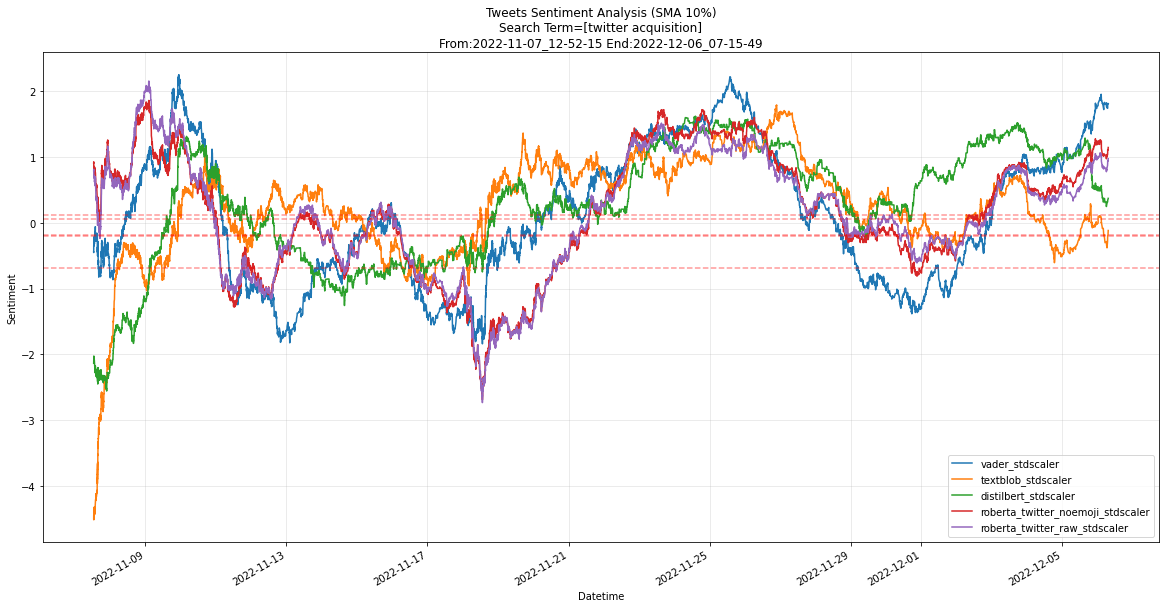

Model Raw Means

vader = 0.12
textblob = 0.06
distilbert = -0.68
roberta_twitter_noemoji = -0.18
roberta_twitter_raw = -0.20



In [ ]:
#@title Enter the Sliding Window width as Percent of Novel length (default 10%, larger=smoother)

plt.rcParams['figure.figsize'] = [20, 10]

# Dict of sentiment model means
sentiment_mean_dt = {}

window_percent = 10 #@param {type:"slider", min:1, max:20, step:1}

win_per = int(window_percent/100 * data_df.shape[0])

vader_col = f'vader_sma{window_percent}'
data_df[vader_col] = data_df['vader'].rolling(win_per, center=True, min_periods=1).mean()
sentiment_mean_dt['vader'] = data_df['vader'].mean()

textblob_col = f'textblob_sma{window_percent}'
data_df[textblob_col] = data_df['textblob'].rolling(win_per, center=True, min_periods=1).mean()
sentiment_mean_dt['textblob'] = data_df['textblob'].mean()

distilbert_col = f'distilbert_sma{window_percent}'
data_df[distilbert_col] = data_df['distilbert'].rolling(win_per, center=True, min_periods=1).mean()
sentiment_mean_dt['distilbert'] = data_df['distilbert'].mean()

roberta_twitter_noemoji_col = f'roberta_twitter_noemoji_sma{window_percent}'
data_df[roberta_twitter_noemoji_col] = data_df['roberta_twitter_noemoji'].rolling(win_per, center=True, min_periods=1).mean()
sentiment_mean_dt['roberta_twitter_noemoji'] = data_df['roberta_twitter_noemoji'].mean()

roberta_twitter_raw_col = f'roberta_twitter_raw_sma{window_percent}'
data_df[roberta_twitter_raw_col] = data_df['roberta_twitter_raw'].rolling(win_per, center=True, min_periods=1).mean()
sentiment_mean_dt['roberta_twitter_raw'] = data_df['roberta_twitter_raw'].mean()

# Normalize Time Series to same y-range
sentiment_model_ls = [vader_col, textblob_col, distilbert_col, roberta_twitter_noemoji_col, roberta_twitter_raw_col]
sentiment_model_norm_ls = ['vader_stdscaler',
                           'textblob_stdscaler',
                           'distilbert_stdscaler',
                           'roberta_twitter_noemoji_stdscaler',
                           'roberta_twitter_raw_stdscaler']

data_df[sentiment_model_norm_ls] = StandardScaler().fit_transform(data_df[sentiment_model_ls])


data_df.plot(y=sentiment_model_norm_ls, x='datetime')

plt.title(f'Tweets Sentiment Analysis (SMA {window_percent}%)\nSearch Term=[{search_term}]\nFrom:{start_retrieve_date} End:{end_retrieve_date}')
plt.ylabel('Sentiment')
plt.xlabel('Datetime')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

model_mean_str = 'Model Raw Means\n\n'
for amodel, amean in sentiment_mean_dt.items():
  model_mean_str += f'{amodel} = {amean:.2f}\n'
  _ = plt.axhline(y = amean, label='book', color='red', linestyle='--', alpha=0.4)

# place a text box in upper left in axes coords
"""
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
_ = plt.text(0.0, 0.0, model_mean_str, 
             # transform=plt.transAxes, 
             fontsize=10,
             verticalalignment='top', 
             bbox=props)
"""

plt.show();

print(f'{model_mean_str}')

In [ ]:
data_df.head()
data_df.info()

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id,...,vader_sma10,textblob_sma10,distilbert_sma10,roberta_twitter_noemoji_sma10,roberta_twitter_raw_sma10,vader_stdscaler,textblob_stdscaler,distilbert_stdscaler,roberta_twitter_noemoji_stdscaler,roberta_twitter_raw_stdscaler
0,2022-11-07 12:52:15+00:00,1589601624531423233,"I love how we add ""gate"" to every scandal out ...",DirtyDryIce,0,0,0,0,<NA>,<NA>,...,0.110810,-0.000269,-0.776582,-0.146000,-0.162000,-0.443146,-4.494992,-2.134330,0.906842,0.793061
1,2022-11-07 12:53:27+00:00,1589601928870514690,the thing I find most hilarious about a migrat...,elfexgirlfriend,1,0,4,0,<NA>,<NA>,...,0.110589,0.000131,-0.773414,-0.147705,-0.163673,-0.451592,-4.466261,-2.064348,0.867299,0.756440
2,2022-11-07 12:53:28+00:00,1589601932364361728,While elon musk said 'comedy is now legal' fol...,psalm7115,0,0,1,0,<NA>,<NA>,...,0.112050,0.000223,-0.773791,-0.147410,-0.163347,-0.395787,-4.459632,-2.072688,0.874125,0.763578
3,2022-11-07 12:54:35+00:00,1589602211533066246,Musk’s $44 billion acquisition deal piled Twit...,AnneHandler,0,0,0,0,<NA>,<NA>,...,0.113399,0.000488,-0.774204,-0.145129,-0.161034,-0.344272,-4.440612,-2.081805,0.927042,0.814216
4,2022-11-07 12:56:12+00:00,1589602618015449090,EsensConsulting: #Decentralized : #Mastodon re...,Guillaume_GCH,0,0,0,1,<NA>,<NA>,...,0.111533,-0.000518,-0.774649,-0.146825,-0.162698,-0.415532,-4.512876,-2.091641,0.887695,0.777770


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   datetime                           10000 non-null  datetime64[ns, UTC]
 1   id                                 10000 non-null  int64              
 2   tweet                              10000 non-null  string             
 3   username                           10000 non-null  string             
 4   reply_ct                           10000 non-null  int64              
 5   retweet_ct                         10000 non-null  int64              
 6   like_ct                            10000 non-null  int64              
 7   quote_ct                           10000 non-null  int64              
 8   retweeted_id                       0 non-null      string             
 9   quoted_id                          701 non-null    

In [ ]:
data_df.datetime

0      2022-11-07 12:52:15+00:00
1      2022-11-07 12:53:27+00:00
2      2022-11-07 12:53:28+00:00
3      2022-11-07 12:54:35+00:00
4      2022-11-07 12:56:12+00:00
                  ...           
9995   2022-12-06 06:48:11+00:00
9996   2022-12-06 06:53:24+00:00
9997   2022-12-06 06:53:33+00:00
9998   2022-12-06 07:06:49+00:00
9999   2022-12-06 07:15:49+00:00
Name: datetime, Length: 10000, dtype: datetime64[ns, UTC]

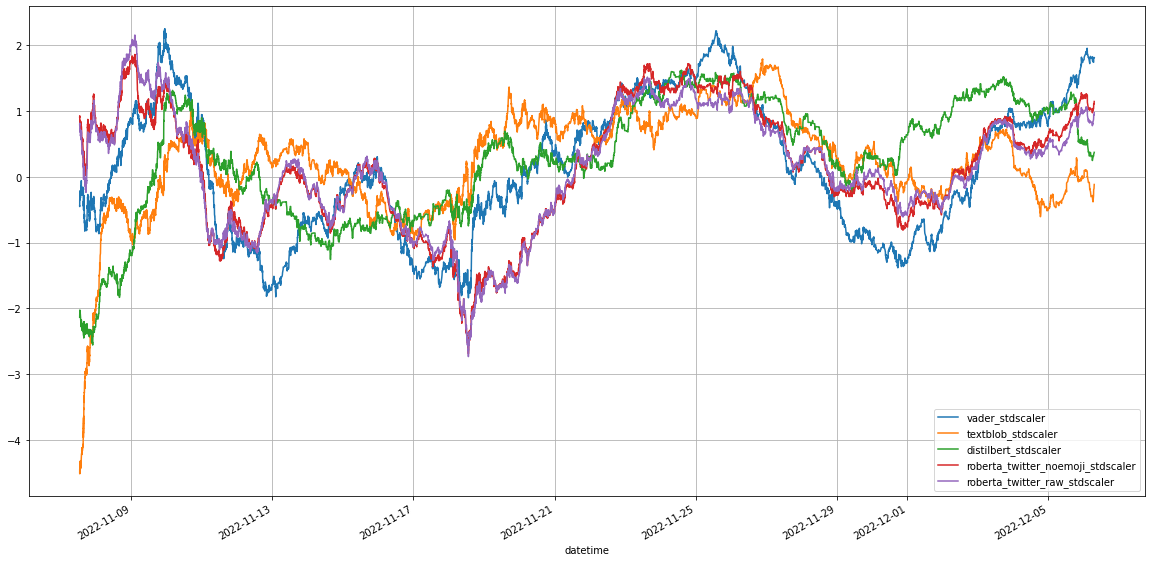

In [ ]:
# Create a reduced DataFrame of mean values based upon mean sentiment values of multiple same day tweets

sentiment_mean_df = data_df.groupby(['datetime']).mean()
_ = sentiment_mean_df[['vader_stdscaler','textblob_stdscaler','distilbert_stdscaler','roberta_twitter_noemoji_stdscaler','roberta_twitter_raw_stdscaler']].plot(grid=True)

# **Crux Detection**

In [ ]:
#@title Which Lexicon?

Sentiment_Model = "RoBERTa_Twitter_Raw" #@param ["VADER", "TextBlob", "DistilBERT","RoBERTa_Twitter_NoEmoji","RoBERTa_Twitter_Raw"]

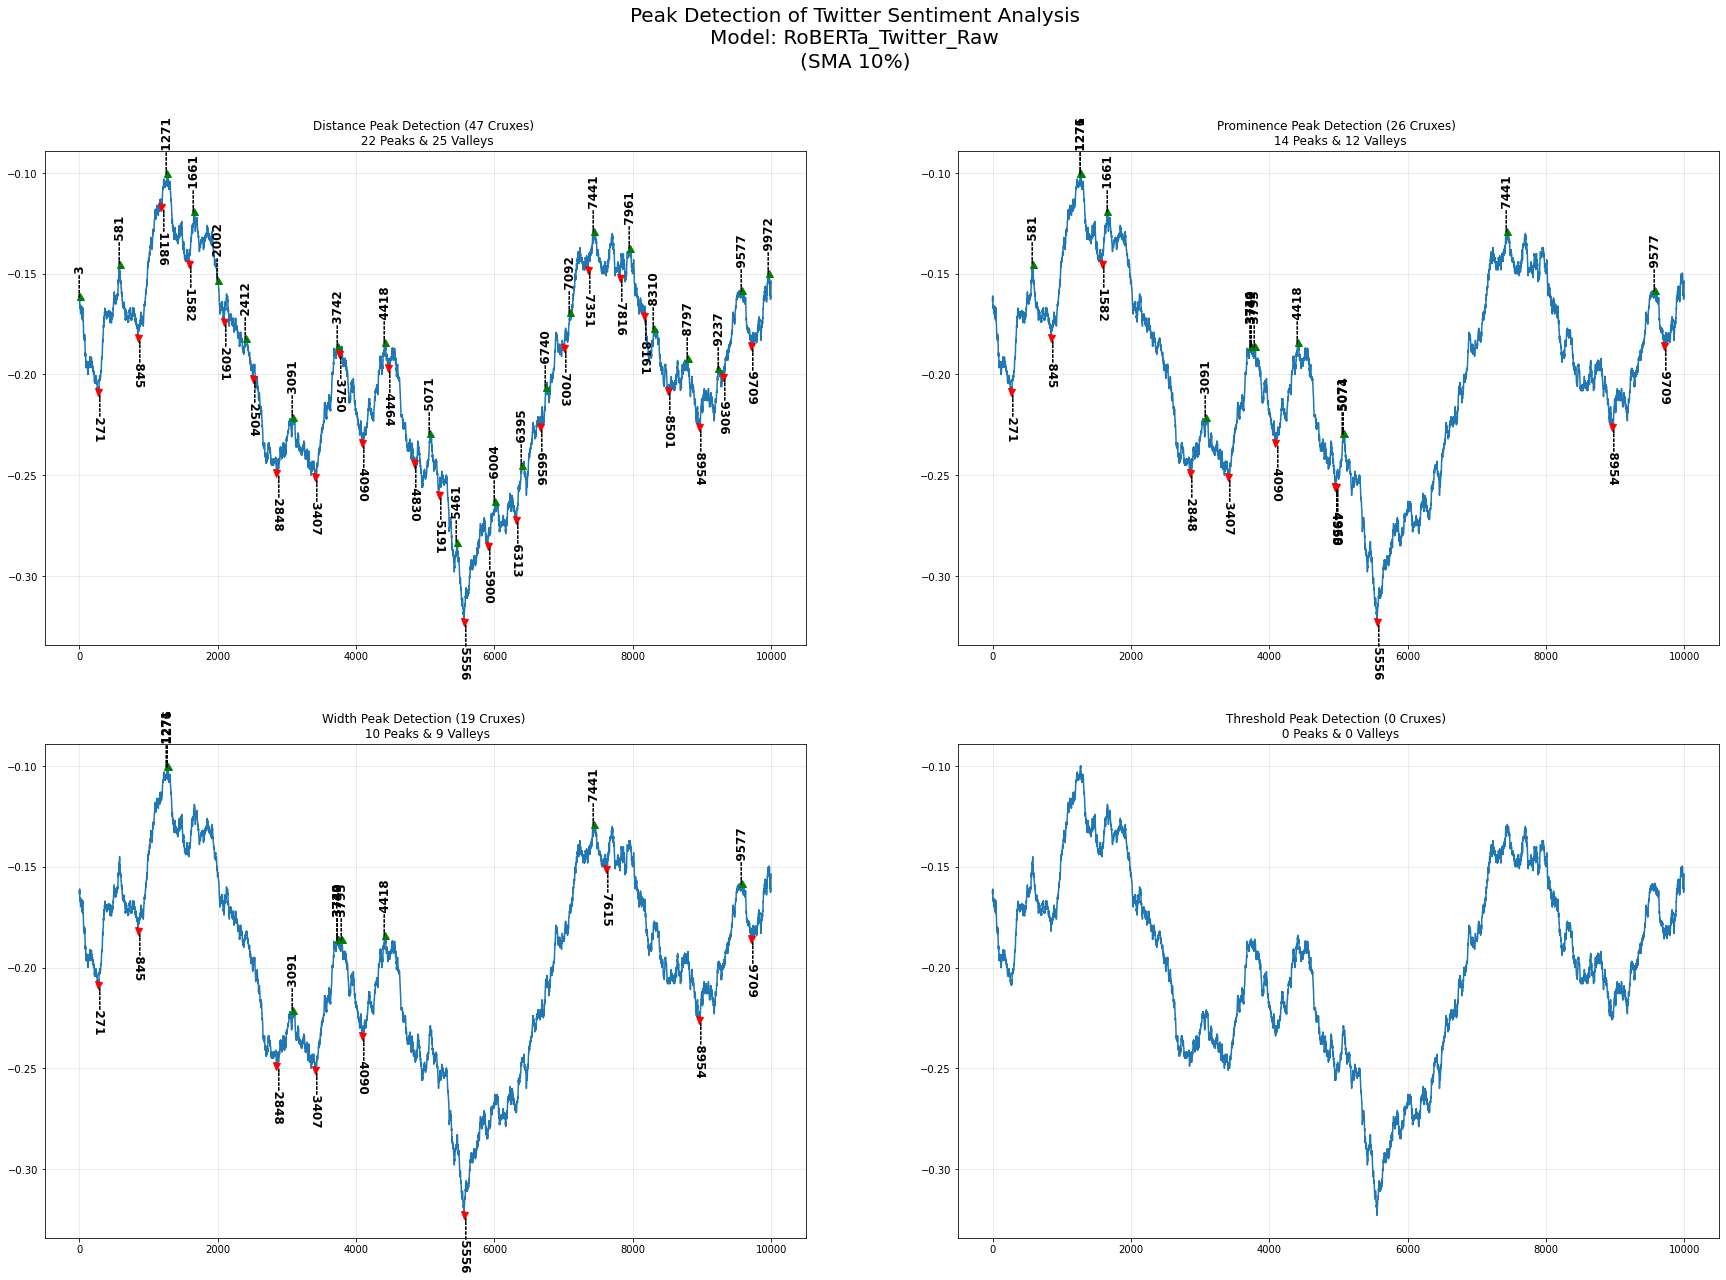

In [ ]:
#@title Tune the main Hyperparameter for each of the 4 Peak Detection Algorithms:

Distance_Min = 340 #@param {type:"slider", min:50, max:1000, step:10}
Prominence_Min = 0.021 #@param {type:"slider", min:0.001, max:0.05, step:0.001}
Width_Min = 135 #@param {type:"slider", min:10, max:500, step:5}
Threshold_Min = 0.005 #@param {type:"slider", min:0.001, max:0.01, step:0.001}

plt.rcParams['figure.figsize'] = [30, 20]

model_name = f'{Sentiment_Model.lower()}_sma{window_percent}'

x = data_df[model_name]

# Peak Algo #1 (by Distance)
distance_min = Distance_Min # 750

# Peak Algo #2 (by Prominence)
prominence_min = Prominence_Min # 0.01

# Peak Algo #3 (by Width)
width_min = Width_Min # 175

# Peak Algo #4 (by Threshold)
threshold_min = Threshold_Min # 0.001


peaks, _ = find_peaks(x, distance=distance_min)
peaks2, _ = find_peaks(x, prominence=prominence_min)      # BEST!
peaks3, _ = find_peaks(x, width=width_min)
peaks4, _ = find_peaks(x, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


x_inv = pd.Series([-x for x in data_df[model_name].to_list()])

valleys, _ = find_peaks(x_inv, distance=distance_min)
valleys2, _ = find_peaks(x_inv, prominence=prominence_min)      # BEST!
valleys3, _ = find_peaks(x_inv, width=width_min)
valleys4, _ = find_peaks(x_inv, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


_ = plt.subplot(2, 2, 1)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Distance Peak Detection ({len(peaks)+len(valleys)} Cruxes) \n {len(peaks)} Peaks & {len(valleys)} Valleys')
_ = plt.plot(peaks, x[peaks], "^g", markersize=7)
_ = plt.plot(valleys, x[valleys], "vr", markersize=7)
for x_val in peaks:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

_ = plt.subplot(2, 2, 2)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Prominence Peak Detection ({len(peaks2)+len(valleys2)} Cruxes) \n {len(peaks2)} Peaks & {len(valleys2)} Valleys')
_ = plt.plot(peaks2, x[peaks2], "^g", markersize=7)
_ = plt.plot(valleys2, x[valleys2], "vr", markersize=7)
for x_val in peaks2:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys2:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


_ = plt.subplot(2, 2, 3)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Width Peak Detection ({len(peaks3)+len(valleys3)} Cruxes) \n {len(peaks3)} Peaks & {len(valleys3)} Valleys')
_ = plt.plot(valleys3, x[valleys3], "vr", markersize=7)
_ = plt.plot(peaks3, x[peaks3], "^g", markersize=7)
for x_val in peaks3:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys3:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


_ = plt.subplot(2, 2, 4)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Threshold Peak Detection ({len(peaks4)+len(valleys4)} Cruxes) \n {len(peaks4)} Peaks & {len(valleys4)} Valleys')
_ = plt.plot(valleys4, x[valleys4], "vr", markersize=7)
_ = plt.plot(valleys4, x[valleys4], "^g", markersize=7)
for x_val in peaks4:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys4:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

_ = plt.suptitle(f'Peak Detection of Twitter Sentiment Analysis\nModel: {Sentiment_Model}\n(SMA {window_percent}%)', fontsize=20)
_ = plt.grid(True, alpha=0.3)

_ = plt.show()

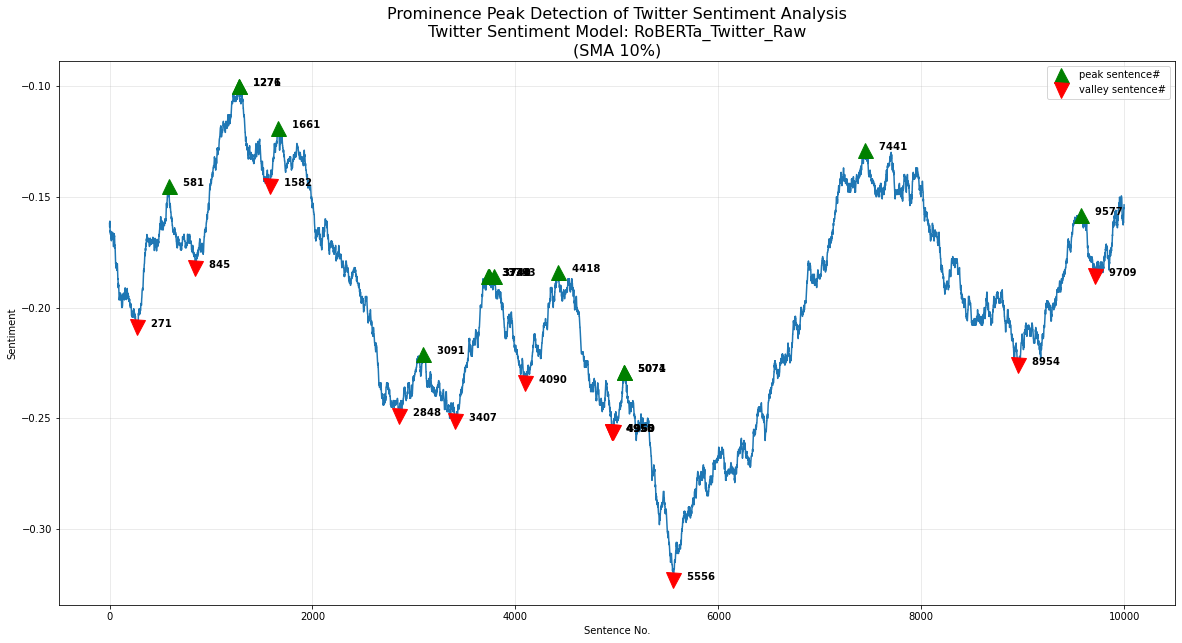



     >>>>> SAVED PLOT TO FILE: [twitter_plot_cruxes_twitter_acquisition_2022-11-01_2022-11-14.png] <<<<<


In [ ]:
#@title Select a Peak Detection Algorithms to View in Detail (usually Distance or Width is best):

plt.rcParams['figure.figsize'] = [20, 10]

Peak_Algorithm = "Prominence" #@param ["Distance", "Prominence", "Width", "Threshold"]

if Peak_Algorithm == 'Distance':
  peaks = peaks
  valleys = valleys
elif Peak_Algorithm == 'Prominence':
  peaks = peaks2
  valleys = valleys2  
elif Peak_Algorithm == 'Width':
  peaks = peaks3
  valleys = valleys3
else:
  # Assume Peak_Algorithm == 'Threshold'
  peaks = peaks4
  valleys = valleys4

# model_name = f'{Sentiment_Model.lower()}_sma10'

# x = novel_clean_df[model_name]

# peaks2, _ = find_peaks(x, prominence=peak_prominence)  

# x_inv = pd.Series([-x for x in novel_clean_df[model_name].to_list()])
# valleys2, _ = find_peaks(x_inv, prominence=peak_prominence)     

_ = plt.plot(x)
_ = plt.plot(peaks, x[peaks], "^g", markersize=15, label='peak sentence#')
_ = plt.plot(valleys, x[valleys], "vr", markersize=15, label='valley sentence#')
for x_val in peaks:
  _ = plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
for x_val in valleys:
  _ = plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
_ = plt.title(f'{Peak_Algorithm} Peak Detection of Twitter Sentiment Analysis\nTwitter Sentiment Model: {Sentiment_Model}\n(SMA {window_percent}%)', fontsize=16)
_ = plt.ylabel('Sentiment')
_ = plt.xlabel('Sentence No.')
_ = plt.legend(loc='best')
_ = plt.grid(True, alpha=0.3)

filename_plot = f"twitter_plot_cruxes_{search_term.replace(' ', '_')}_{start_date}_{end_date}.png"
_ = plt.savefig(filename_plot, dpi=300)
_ = plt.show();

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_plot}] <<<<<')

In [ ]:
# Download Crux Point Plot file 'crux_plot.png' to your laptop

files.download(filename_plot)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Get Context around Crux Points**

In [ ]:
#@title How many Sentences around Crux Point do you want to view for context?

Crux_Sentence_Context_Count = 19 #@param {type:"slider", min:1, max:20, step:1}


In [ ]:
# Print Context around each Sentiment Peak

output_ls = []

halfwin = int(Crux_Sentence_Context_Count/2)
crux_sents_ls = []
nl = '\n'

print('==================================================')
print('============     Peak Crux Points   ==============')
print('==================================================\n\n')

output_ls.append('==================================================')
output_ls.append('============     Peak Crux Points   ==============')
output_ls.append('==================================================\n\n')

# for i, apeak in enumerate(peaks2):
for i, apeak in enumerate(peaks):
  print(f'Processing Peak #{i}...')
  crux_sents_ls = []
  indx_start = apeak-halfwin
  indx_start = max(indx_start, 0)
  indx_end = apeak+halfwin
  indx_end = min(indx_end, data_df.shape[0])
  for sent_idx in range(indx_start, indx_end):
    sent_cur = data_df.iloc[sent_idx].text_raw
    if sent_idx == apeak:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)
  
  # context_ls = data_df.iloc[apeak-halfwin:apeak+halfwin].text_raw
  print(f"Peak #{i} at Sentence #{apeak}:\n\n{nl.join(crux_sents_ls)}\n\n\n")
  output_ls.append(f"Peak #{i} at Sentence #{apeak}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

print('==================================================')
print('===========     Crux Valley Points    ============')
print('==================================================\n\n')

output_ls.append('==================================================')
output_ls.append('===========     Crux Valley Points    ============')
output_ls.append('==================================================\n\n')

# for i, avalley in enumerate(valleys2):
for i, avalley in enumerate(valleys):
  print(f'Processing Valley #{i}')
  crux_sents_ls = []
  for sent_idx in range(avalley-halfwin,avalley+halfwin+1):
    sent_cur = data_df.iloc[sent_idx].text_raw
    if sent_idx == avalley:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)

  # context_ls = novel_df.iloc[avalley-halfwin:avalley+halfwin].text_raw
  print(f"Valley #{i} at Sentence #{avalley}:\n\n{nl.join(crux_sents_ls)}\n\n\n")
  output_ls.append(f"Valley #{i} at Sentence #{avalley}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

filename_cruxes = f"twitter_cruxes_context_{search_term.replace(' ', '_')}_{start_date}_{end_date}.txt" 

output_str = ' '.join(output_ls)

with open(filename_cruxes, 'w') as f:
    f.write(output_str)

============     Peak Crux Points   ==============


Processing Peak #0...
Peak #0 at Sentence #581:

Nobody who was wringing their hands about Musk's acquisition of Twitter did so because they worried he would tweet a milquetoast endorsement of divided government. They worried he would turn the mechanics of the site into an asset in the GOP's arsenal, which has not happened. https://t.co/3pYqHbmPzv
Hello Everyone!

We have noticed a Huge spike in user count after a recent Event With twitter's new Acquisition, But worry not!

We are helping people migrate to the Open Source Federated Network #MastodonSocial 

Feel free to ask Any question You want! We are here to help.
Someone needs to explain to me how Elon's Twitter acquisition furthers his primary goal of colonizing Mars, which he claims is a strategy to protect against human extinction.
Tesla’s Post-Twitter Selloff Has Stock Setting New 52-Week Low (TSLA) - amid Musk’s highly public acquisition of Twitter. Ever since Musk closed hi

98382

In [ ]:
# Download Crux Point Report file 'cruxes.txt' to your laptop

files.download(filename_cruxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cat $filename_cruxes

================================================== ============     Peak Crux Points   ============== ==================================================

 Peak #0 at Sentence #581:

Nobody who was wringing their hands about Musk's acquisition of Twitter did so because they worried he would tweet a milquetoast endorsement of divided government. They worried he would turn the mechanics of the site into an asset in the GOP's arsenal, which has not happened. https://t.co/3pYqHbmPzv
Hello Everyone!

We have noticed a Huge spike in user count after a recent Event With twitter's new Acquisition, But worry not!

We are helping people migrate to the Open Source Federated Network #MastodonSocial 

Feel free to ask Any question You want! We are here to help.
Someone needs to explain to me how Elon's Twitter acquisition furthers his primary goal of colonizing Mars, which he claims is a strategy to protect against human extinction.
Tesla’s Post-Twitter Selloff Has Stock Setting New 52-Week Low (TSL

# **END OF NOTEBOOK**